In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from scipy import stats
from scipy import misc

## Detailed Balance ##

The Markov Chains that we have been studying have stationary distributions that contain much information about the behavior of the chain. The stationary distribution of a chain is a probability distribution that solves the balance equations. For some chains it is easy to identify a distribution that solves the balance equations. But for other chains, the solution can be complicated or tedious. Let's see if we can find a simple way to solve the balance equations.

Recall our earlier image of what is being balanced in the equations. Imagine a large number of independent replications of the chain. For example, suppose a large number of particles are moving among the states according to the transition probabilities of the chain, all moving at instants 1, 2, 3, $\ldots$ independently of each other.

Suppose the chain is in steady state. As we said earlier, if you think of $\pi(k)$ as the proportion of particles leaving state $k$ at any instant, then the balance equations

$$
\pi(j) = \sum_{k \in S} \pi(k)P(k, j)
$$

say that the proportion of particles leaving state $j$ is the same as the number of particles entering it. Hence the chain is balanced.

Notice that the left hand side is just the proportion of particles leaving $j$; there is no information about where the particles are going. 

Now suppose there is *detailed balance*, given by

$$
\pi(i)P(i, j) = \pi(j)P(j, i) ~~~ \text{for all states } i \ne j
$$

These are called the *detailed balance equations*. They say that for every pair of states $i$ and $j$, the proportion of particles that leave $i$ and move directly to $j$ is the same as the proportion that leave $j$ and move directly to $i$. In the case $i = j$ the equations carry no information and hence are left out.

That turns out to be a stronger condition than balance. 

### Detailed Balance Implies Balance ###
Suppose there is a probability distribution $\pi$ that solves the detailed balance equations. Then $\pi$ also solves the balance equations.
$$
\begin{align*}
\sum_{k \in S} \pi(k)P(k, j) &= \sum_{k \in S} \pi(j)P(j, k) ~~~ \text{(detailed balance)} \\
&= \pi(j) \sum_{k \in S} P(j, k) \\
&= \pi(j) \cdot 1 ~~~~~~~~~~~~~~ \text{(sum of }j\text{th row of transition matrix)} \\
&= \pi(j)
\end{align*}
$$

What we learn from this is that if we can find a solution to the detailed balance equations, we will also have solved the balance equations.

This is helpful for two reasons:

- The detailed balance equations are simple.
- There are lots of them; indeed if there are $s$ states then there are $\binom{s}{2}$ detailed balance equations in $s$ unknowns. This gives us lots of ways to try to solve them.

Of course all the $\binom{s}{2}$ equations need not be consistent, in which case there will not be a solution to the detailed balance equations. In such situations we'll have to slog our way through solving the balance equations directly. But here is an example that shows that if the detailed balance equations do have a solution, we have an easy way at arriving at the stationary distribution of the chain.

### Ehrenfest Chain ###
We have returned to this example because it is one where solving the balance equations involves some labor. We will show that for this chain and others like it, the detailed balance equations can easily be solved, giving us a quick route to the stationary distribution.

The state space is the integers 0 through $N$. Recall how the transitions work: at each step, the chain either goes up by 1, stays the same, or goes down by 1. Such chains are called *birth and death* chains and are used to model many different random quantities such as gamblers' fortunes or population sizes. In our example, we are modeling the size of the population of gas particles in a container.

For such chains, most of the transition probabilities are 0 because in one step the chain can only move to the two neighboring states. So most of the detailed balance equations are trivially true. For the ones the involve positive tranistion probabilities, the states $i$ and $j$ have to be separated by 1 (remember that the detailed balance equations specify $i \ne j$). And in that case both $P(i, j)$ and $P(j, i)$ are positive, as the chain is irreducible.

This allows us to solve the detailed balance equations, for example by starting at the lowest state and moving up. Remember the transition rules:

- At each step, select one of the $N$ particles at random and place it into one of the two containers at random; the chain counts the number of particles in Container 1.

The detailed balance equations are easy to solve sequentially:
$$
\begin{align*}
\pi(0)\frac{1}{2} &= \pi(1)\frac{1}{2N} ~~ \implies ~~ \pi(1) = N\pi(0)
= \binom{N}{1}\pi(0) \\ \\
\pi(1)\frac{N-1}{2N} &= \pi(2)\frac{2}{2N} ~~ \implies ~~ \pi(2) = \frac{N-1}{2}\pi(1) = \frac{N(N-1)}{2}\pi(0) = \binom{N}{2}\pi(0) \\ \\
\pi(2)\frac{N-2}{2N} &= \pi(3)\frac{3}{2N} ~~ \implies ~~ \pi(3) = \frac{N-2}{3}\pi(2) = \frac{N(N-1)(N-2)}{3\cdot 2} \pi(0) = \binom{N}{3}\pi(0)
\end{align*}
$$

and so on, so that for $1 \le k \le N$,
$$
\pi(k) = \binom{N}{k} \pi(0)
$$
by a far easier induction than the one needed to solve the balance equations. The sum of the terms in the solution is

$$
\pi(0)\big{(} 1 + \sum_{k=1}^N \binom{N}{k} \big{)}
= \pi(0)\sum_{k=0}^N \binom{N}{k}
= \pi(0)2^N
$$

by the binomial theorem. So $\pi(0) = 2^{-N}$ and the stationary distribution is binomial $(N, 1/2)$.

At this point it is worth remembering that for numerical value of $N$ you can just use `steady_state` to find the stationary distribution, relying on Python to do all the work for you. This has some clear advantages but also some disadvantages:
- Python will not be able to handle the computation when $N$ is very large.
- You will either not see that the distribution is just binomial or will see it and not know why.

These are reasons why, even in the age of powerful personal computers, it is still important to find good ways of solving problems using math.

### Sticky Random Walk on a Circle ###
Suppose a chain has states 0, 1, 2, 3, 4 arranged in sequence clockwise on a circle. Suppose that at each step the chain stays in place with probability $s$, moves to its counterclockwise neighbor with probability $p$, and to its clockwise neighbor with probability $r$. Here $s$, $p$, and $r$ are strictly positive and sum to 1. 

It is clear that the behavior of the chain is symmetric in the five states, and therefore in the long run it is expected to spend the same proportion of time in each state. The stationary distribution is uniform on the states. You can also check this by solving the balance equations.

Let's see whether the detailed balance equations are satisfied. Unlike the Ehrenfest chain above, this chain can "loop back around." So it's not clear that the detailed balance equations are consistent.

The detailed balance equations are:
$$
\begin{align*}
\pi(0)r = \pi(1)p ~~~~ \implies \pi(1) = \frac{r}{p}\pi(0) \\ 
\pi(1)r = \pi(2)p ~~~~ \implies \pi(2) = \frac{r^2}{p^2}\pi(0) \\ 
\pi(2)r = \pi(3)p ~~~~ \implies \pi(3) = \frac{r^3}{p^3}\pi(0) \\ 
\pi(3)r = \pi(4)p ~~~~ \implies \pi(4) = \frac{r^4}{p^4}\pi(0) 
\end{align*}
$$
So far so good, but now for the moment of truth:

$$
\pi(4)r = \pi(0)p ~~~~ \implies \pi(4) = \frac{p}{r}\pi(0)
$$

For this system of equations to be consistent and have a positive solution, the two expressions for $\pi(4)$ must be equal, which is equivalent to

$$
\frac{r^4}{p^4} = \frac{p}{r}, ~~~ \text{that is, } ~r^5 = p^5
$$

This can only happen if $r = p$, and in that case the detailed balance equations say that all the entries of $\pi$ are equal, which we already knew.

To summarize:

- The stationary distribution of the chain is uniform on all the states. The uniform distribution satisfies the balance equations.
- When $r = p$, the detailed balance equations have a positive solution which is the stationary distribution.
- When $r \ne p$ the detailed balance equations have no solution that is a probability distribution.

Clearly, $r = p$ has a special status. What exactly does that mean for the behavior of this chain? That's the topic of the next section. For now, here are simulated paths of the chain, for two sets of parameters:
- `circle_walk_1`: $s = 0.1$, $r = 0.6$, $p = 0.3$
- `circle_walk_2`: $s = 0.1$, $r = 0.3$, $p = 0.6$

The chance of staying in place is the same for both, but the chances of clockwise and counterclockwise moves have been switched. Here are simulated paths of the two chains. In the plot, "clockwise" is shown as a move up and "counterclockwise" as a move down.

Look at the paths (simulate some more if you like) and answer the following questions:
- Which one has more "up" transitions than "down"?
- If someone showed you the path of one of these two processes but didn't say which of the two it was, could you identify the process?

In [2]:
states = np.arange(5)

s = 0.1
r = 0.6
p = 0.3

def transition_prob(i, j):
    if i == j:
        return s
    elif j == (i+1) % 5:
        return r
    elif j == (i-1) % 5:
        return p
    else:
        return 0
    
circle_walk_1 = MarkovChain.from_transition_function(states, transition_prob)

In [3]:
circle_walk_1

,0,1,2,3,4
0,0.1,0.6,0.0,0.0,0.3
1,0.3,0.1,0.6,0.0,0.0
2,0.0,0.3,0.1,0.6,0.0
3,0.0,0.0,0.3,0.1,0.6
4,0.6,0.0,0.0,0.3,0.1


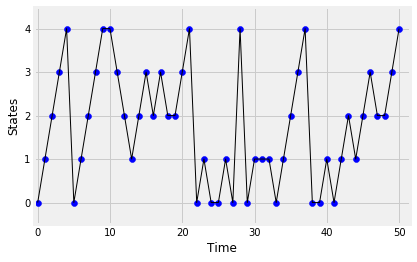

In [4]:
circle_walk_1.simulate_path(0, 50, plot_path=True)

In [5]:
s = 0.1
r = 0.3
p = 0.6

circle_walk_2 = MarkovChain.from_transition_function(states, transition_prob)

In [6]:
circle_walk_2

,0,1,2,3,4
0,0.1,0.3,0.0,0.0,0.6
1,0.6,0.1,0.3,0.0,0.0
2,0.0,0.6,0.1,0.3,0.0
3,0.0,0.0,0.6,0.1,0.3
4,0.3,0.0,0.0,0.6,0.1


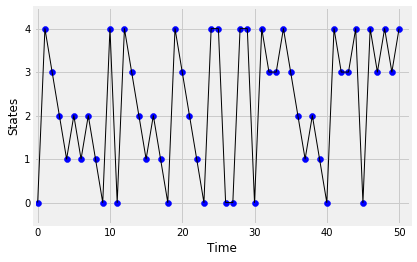

In [7]:
circle_walk_2.simulate_path(0, 50, plot_path=True)